# **Import Necessary Libraries**

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm 

import warnings
warnings.filterwarnings("ignore")

# **Load the Dataset**

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **Understand the Dataset**

In [20]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


In [21]:
def mnist_statistical_summary(x_train):
    print("MNIST Dataset Statistics:")
    print(f"Total samples: {x_train.shape[0]}")
    print(f"Image dimensions: {x_train.shape[1:3]}")
    print(f"Pixel intensity range: {x_train.min()} - {x_train.max()}")
    print(f"Mean pixel intensity: {x_train.mean()}")
    print(f"Standard deviation of pixel intensity: {x_train.std()}")

mnist_statistical_summary(x_train)

MNIST Dataset Statistics:
Total samples: 60000
Image dimensions: (28, 28)
Pixel intensity range: 0 - 255
Mean pixel intensity: 33.318421449829934
Standard deviation of pixel intensity: 78.56748998339798


## **Visualize Some Example Images**

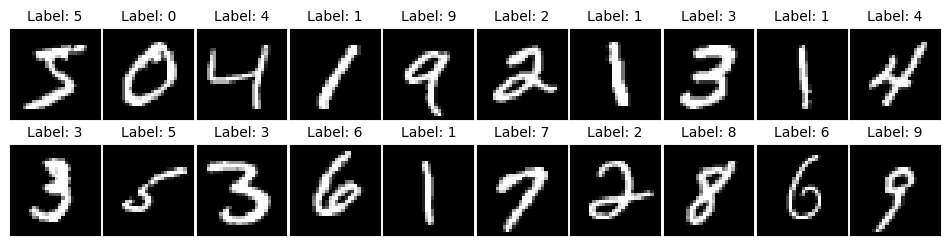

In [22]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(f"Label: {str(y_train[i])}", fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

##  **Frequency Distribution of Target Labels y_train and y_test**

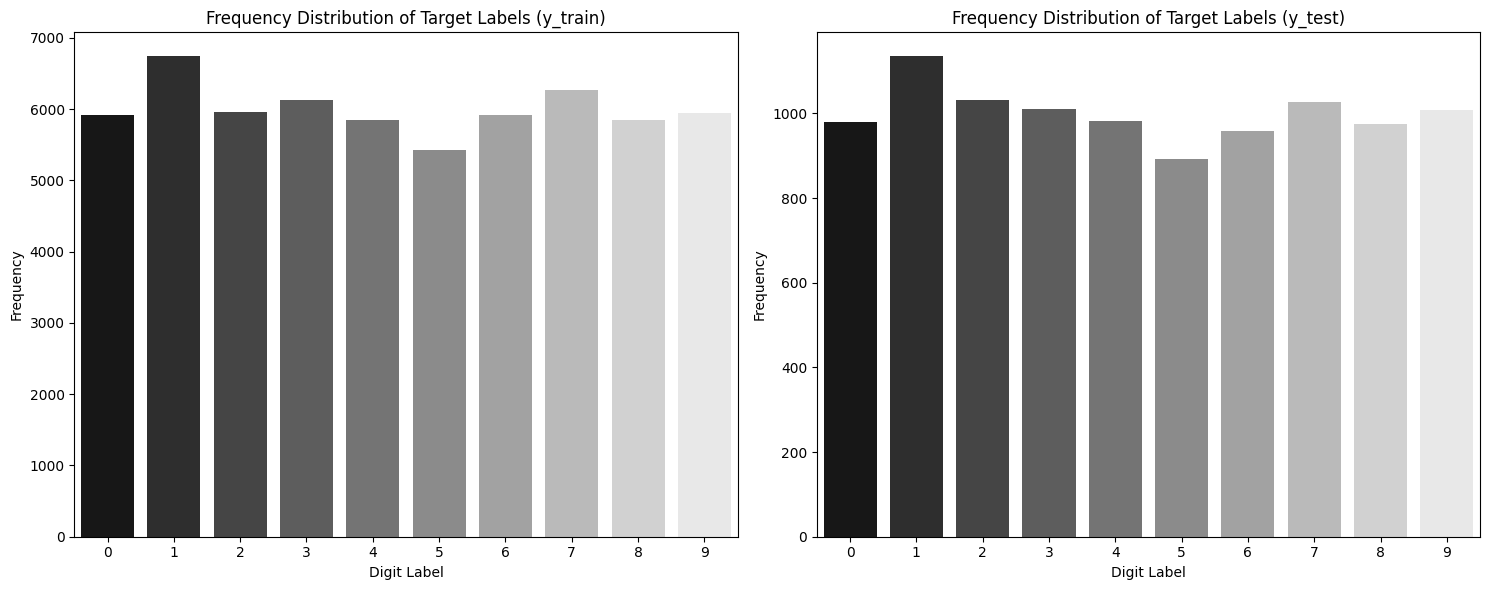

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Organize The Dataset (Preprocessing)**

## **Normalization**

***Our aim here is to normalize the images in the MNIST dataset and bring them to a scale between -1 and 1.***
* ***The value of pixels in the MNIST dataset is between 0 and 255.***
* ***- 127.5 / 127.5 With these operations we scale the value of the data between -1 and 1.***


***But if you want, you can also try scaling the data set between 0 and 1. With this code logic;***

In [24]:
# x_train = x_train / 255.0

***Why do we normalize between -1 and 1?***
* ***GANs typically use the tanh activation function. The tanh function works best when it takes values between -1 and 1 as input.***
* ***Makes training more stable. Scaling the data between -1 and 1 makes the weight updates more stable.***
* ***In summary, it helps the GAN model learn faster and more stably.***

In [25]:
print("*************************** BEFORE NORMALIZATON ***************************\n")
print(x_train[0])
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
print("\n\n\n---------------------------------------------------------------------------\n\n\n")
print("************************** AFTER NORMALIZATON ***************************\n")
print(x_train[0])

*************************** BEFORE NORMALIZATON ***************************

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0 

## **Adjusting Dimensions**

***(28x28) --> (28, 28, 1)***

***With this code, we make the format of the MNIST dataset suitable for models such as CNN or GAN. We add a single channel to the dataset, which was previously (60000, 28, 28), and turn it into (60000, 28, 28, 1). This allows deep learning models to work.***

In [26]:
print("Before Adjusting Dimensions x_train shape: ", x_train.shape)
x_train = np.expand_dims(x_train, axis=-1)
print("After Adjusting Dimensions x_train shape: ", x_train.shape)

Before Adjusting Dimensions x_train shape:  (60000, 28, 28)
After Adjusting Dimensions x_train shape:  (60000, 28, 28, 1)


# ***Model Building***

***The GAN (Generative Adversarial Network) model consists of two main components: Generator and Discriminator. These two models are trained in a competitive structure against each other.***

## ***Build Generator***

***Its purpose is to generate fake images that look similar enough to real images to fool the Discriminator.***

In [27]:
z_dim=100
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    
    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    
    model.add(Conv2DTranspose(1, kernel_size=3, strides=1, padding="same", activation="tanh"))

    return model

In [28]:
build_generator().summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6272)                │         633,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 28, 28, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 856,705 (3.27 MB)

 Trainable params: 856,065 (3.27 MB)

 Non-trainable params: 640 (2.50 KB)

## ***Build Discriminator***

* ***Its purpose is to discriminate real images from fake ones.***
* ***Learning to call real images 1 and fake images 0.***
* ***But since the Generator keeps producing better fake images, the Discriminator must also improve.***

In [29]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same", input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    return model

In [30]:
build_discriminator().summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

## ***Build Gan***

* ***Its aim is to train the Generator and Discriminator together to create a system that produces highly realistic images.***
* ***At the end of successful training, the Discriminator will no longer be able to discriminate between the fake and the real image, and the Generator will have produced very realistic images.***

In [31]:
def build_gan(generator, discriminator):
    discriminator.trainable = False

    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer= Adam(0.0002, 0.5))

    return model

In [32]:
discriminator = build_discriminator()
generator = build_generator()
gan = build_gan(generator, discriminator)

In [33]:
gan.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (None, 28, 28, 1)           │         856,705 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 1)                   │          80,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 937,474 (3.58 MB)

 Trainable params: 856,065 (3.27 MB)

 Non-trainable params: 81,409 (318.00 KB)

## **Training** 

***With these codes, a total of 10 sample images consisting of 2 rows and 5 columns, which are currently produced, will be displayed every 250 epochs. Since there are 10,000 epochs, I will not see all of them, but the first 750 epochs, and I will interrupt the code. I am a bit impatient, and since this is a training anyway, I think it will be more important to understand the logic. Also, if you have time, try the entire 10,000 epoch training. You can even try more epochs to get better images.***

Training Process:   0%|          | 0/10000 [00:00<?, ?it/s]


0/10000 d_loss: 0.7024282217025757, g_loss: [array(0.6993793, dtype=float32), array(0.6993793, dtype=float32), array(0.34375, dtype=float32)]


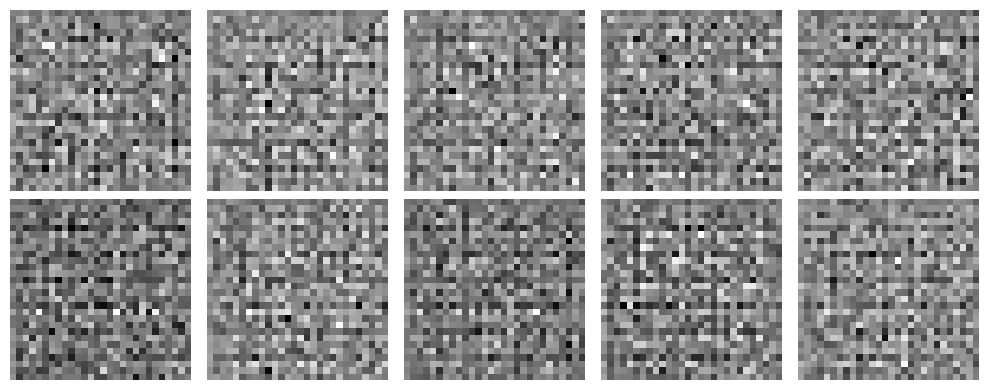

Training Process:   2%|▎         | 250/10000 [03:30<2:21:17,  1.15it/s]


250/10000 d_loss: 0.7903006076812744, g_loss: [array(0.7908179, dtype=float32), array(0.7908179, dtype=float32), array(0.19210657, dtype=float32)]


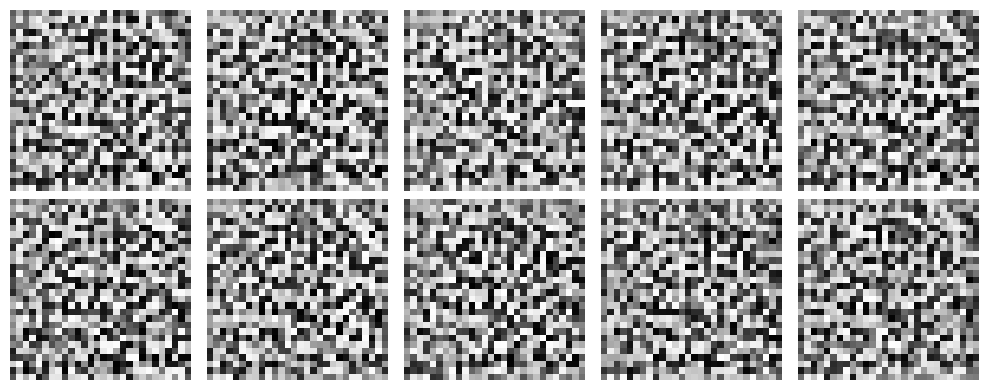

Training Process:   5%|▌         | 500/10000 [07:24<2:35:49,  1.02it/s]


500/10000 d_loss: 0.992202877998352, g_loss: [array(0.9926193, dtype=float32), array(0.9926193, dtype=float32), array(0.18659556, dtype=float32)]


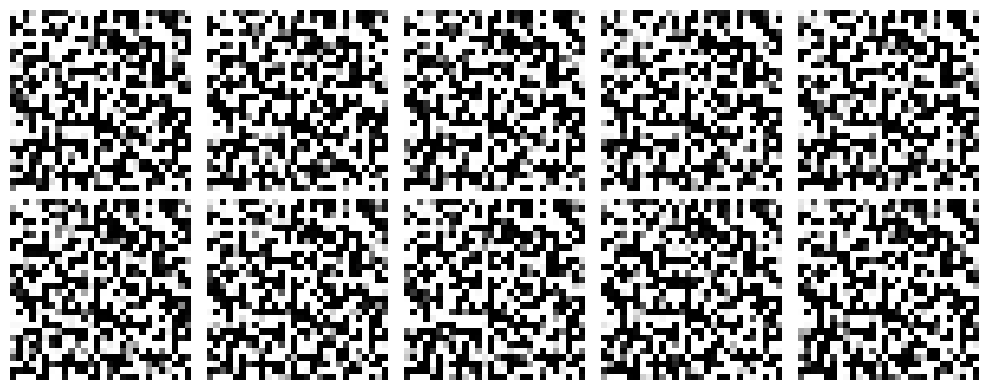

Training Process:   5%|▌         | 502/10000 [07:27<2:21:12,  1.12it/s]


KeyboardInterrupt: 

In [34]:
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

d_losses = []
g_losses = []

for epoch in tqdm(range(epochs), desc = "Training Process"):
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_images = x_train[idx]
    real_labels = np.ones((half_batch, 1))

    noise = np.random.normal(0, 1, (half_batch, z_dim))
    fake_images = generator.predict(noise, verbose = 0)
    fake_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = np.add(d_loss_real, d_loss_fake) * 0.5

    noise = np.random.normal(0, 1, (batch_size, z_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    d_losses.append(d_loss[0])
    g_losses.append(g_loss[0])

    if epoch %250 == 0:
        print(f"\n{epoch}/{epochs} d_loss: {d_loss[0]}, g_loss: {g_loss}")

        noise = np.random.normal(0, 1, (10, z_dim))
        gen_images = generator.predict(noise, verbose=0)
        gen_images = 0.5 * gen_images + 0.5

        fig, axes = plt.subplots(2, 5, figsize=(10, 4))
        for i, ax in enumerate(axes.ravel()):
            ax.imshow(gen_images[i, :, :, 0], cmap='gray')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

# **Evaluation of Model Result**

## **Visualization of Discriminator and Generator Loss**

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Visualization of Generated Images**

In [ ]:
def plot_generated_images(generator, examples=10, dim=(1, 10)):
    noise = np.random.normal(0, 1, (examples, z_dim))
    gen_images = generator.predict(noise, verbose=0)
    gen_images = 0.5 * gen_images + 0.5

    plt.figure(figsize=(10,1))
    for i in range(gen_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(gen_images[i, :, :, 0], cmap="gray")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

plot_generated_images(generator)